### Serie de Fourier 

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import pi

#### La funcion que queremos
\begin{equation}
f(t)= \left\{ \begin{array}{lcc}
             \pi &   si  & -\pi\leq t < 0 \\
             \\ t &  si &  0\leq  t < \pi \\
             \end{array}
   \right.\end{equation}

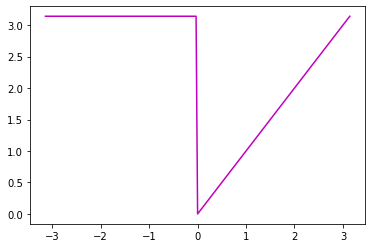

In [4]:
n = 201
x = np.array(np.linspace(-pi,pi,n))
fx = np.full(n,pi)

for i in range(0,n//2 + 1):
    fx[i + n//2] = x[i + n//2]
plt.plot(x,fx, color='m')

#### Segunda forma trigonometrica de la serie de Fourier
\begin{equation}
f_a(t) = D_0 + \sum_{k = 1}^{n}{\left(A_k*cos\left(\frac{2 \Pi kt}{T} \right) + B_k*\sin\left(\frac{2 \Pi kt}{T}\right) \right)}
\end{equation} 

#### Definimos los coeficientes y Do \begin{equation} A_k, B_k , D_0\end{equation} 
\begin{equation} D_0=\frac{3*pi}{4}\end{equation} 
\begin{equation} A_k=\frac{(-1)^n-1}{pi*k^2}\end{equation} 
\begin{equation} B_k=\frac{-1}{k}\end{equation} 


In [5]:
t = np.linspace(-pi,pi,1000)  # el tiempo para los armonicos
tam = 1000 # entre más grade sea tam más exactitud se tendra (propuestos 10, 100, 1000)
a = np.zeros(tam)
b = np.zeros(tam)
k = 1
for i in range(0,tam,1): # calculo de an y bn 
    a[i] = ((-1)**k - 1)/(pi*k**2)
    b[i] = -1/k
    k += 1
Do = 3*pi/4

#### Calculo de los armonicos

In [6]:
armonicos = [] # es una lista de arrays que tiene a todos los armonicos
k = 1
for i in range(0,tam,1):
    armc = a[i]*np.cos(k*t)
    arms = b[i]*np.sin(k*t)
    un_armonico = armc + arms
    armonicos.append(un_armonico)
    k += 1
    
armonicos[0] = armonicos[0] + Do # sumamos el Ao
funcion = np.sum(armonicos,axis=0) #suma todos los armonicos

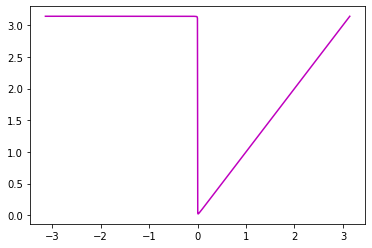

In [5]:
plt.plot(t,funcion,color='m')

Podemos observar que entre más armonicos sumemos, más exactitud se tendra.

#### Forma exponencial de la serie de Fourier
\begin{equation}
f_a(t) = \sum_{k = -n}^{n}{\left(D_k * e^{\frac{i 2 \pi kt}{T}} \right)}
\end{equation} 

#### Definimos Dk 
\begin{equation} D_k = \frac{1}{2 \pi k^2}*((-1)^k - 1) + \frac{i}{2k} \end{equation}

\begin{equation} e^{ikt} = cos(kt) + isen(kt)\end{equation}

calculamos a continuación los coeficientes Dk para n = tam 

In [6]:
tam = 100 # sugeridos 10, 100, 1000
coefis_com = []
w = -tam
for i in range(-tam,0,1):
    uno = (1/(2*pi*w**2))*((-1)**w - 1) # parte real de dk
    dos = 1/(2*w) # parte imaginaria
    d = complex(uno,dos)
    coefis_com.append(d)
    w += 1
w = 1
for i in range(1,tam+1,1):
    uno = (1/(2*pi*w**2))*((-1)**w - 1) # parte real de dk
    dos = 1/(2*w) # parte imaginaria
    d = complex(uno,dos)
    coefis_com.append(d)
    w += 1   

#### Calculo de los armonicos

In [7]:
final_armonicos = [] # es una lista de arrays que tiene a todos los armonicos
k = -tam
for i in range(0,tam,1): # los k's negativos
    armonico = []
    for ele in t:
        f = coefis_com[i]*complex(np.cos(k*ele),np.sin(k*ele))
        armonico.append(f)
    final_armonicos.append(armonico)
    k += 1
    
k = 1
for i in range(0,tam,1): # los k's positivos
    armonico = []
    for ele in t:
        f = coefis_com[i+tam]*complex(np.cos(k*ele),np.sin(k*ele))
        armonico.append(f)
    final_armonicos.append(armonico)
    k += 1
final_armonicos = np.array(final_armonicos)
final_armonicos[0] = final_armonicos[0] + Do # sumamos el Ao
funcion = np.sum(final_armonicos,axis=0) #suma todos los armonicos

C:\Users\hp\miniconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


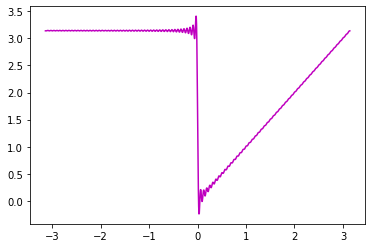

In [8]:
plt.plot(t,funcion,color='m')

#### Primera forma trigonometrica de la serie de Fourier
\begin{equation}
f_a(t) = C_0 + \sum_{k = 1}^{n}{\left(C_k*cos\left( \varphi + \frac{2 \Pi kt}{T}\right) \right)}
\end{equation} 

#### Calculo de Ck
\begin{equation}C_k = \frac{1}{k}*\sqrt{\frac{2(1-(-1)^k)}{k^2 \pi^2} + 1} \end{equation}

\begin{equation} \varphi = angtang\left(\frac{k \pi}{(-1)^k -1}\right)\end{equation}

In [9]:
tam = 10 # sugeridos 10, 100, 1000
Cks = []
angs = []
k = 1
for i in range(1,tam+1,1):
    Ck= 1/k*np.sqrt((2*(1-(-1)**k))/(k**2*pi**2) + 1) 
    ang = np.arctan2((k*pi),((-1)**k - 1))
    Cks.append(Ck)
    angs.append(ang)
    k += 1

#### Calculo de los armonicos

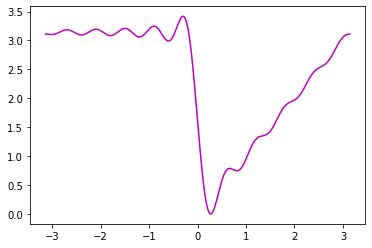

In [10]:
t = np.linspace(-pi,pi,1000)
armonicos = []
k = 1
for i in range(0,tam,1):
    arm = Cks[i]*np.cos(angs[i]+ k*t)
    armonicos.append(arm)
    k += 1

armonicos[0] = armonicos[0]+Do #sumamos el Co
fun = np.sum(armonicos, axis=0)
plt.plot(t,fun, color='m')